In [1]:
## Capstone 3 data wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
os.getcwd()

'C:\\Users\\patid\\Desktop\\Springboard\\Capstone_Pojects\\final_cap_stone_3\\walmart_sales_data\\archive\\DataWrangle'

In [4]:
df_train = pd.read_csv('../train.csv')

In [5]:
df_test = pd.read_csv('../test.csv') # do i need to cancate it with train ? because i have sufficient rows for cleaning and eda

In [6]:
df_store = pd.read_csv('../stores.csv')

In [7]:
df_features = pd.read_csv('../features.csv')

In [8]:
df_train.shape

(421570, 5)

In [9]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [10]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [11]:
df_store.shape

(45, 3)

In [12]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [13]:
df_features.shape

(8190, 12)

In [14]:
# merge train data with store data

df_merge = df_train.merge(df_store, how ='left',on='Store')

In [15]:
# merge df with features
df = df_merge.merge(df_features, how='left',on =['Date','Store'])

<!-- holidays dates 
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13 -->

In [16]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [17]:
df.shape

(421570, 17)

In [18]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')

In [19]:
df.columns

Index(['store', 'dept', 'date', 'weekly_sales', 'isholiday_x', 'type', 'size',
       'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3',
       'markdown4', 'markdown5', 'cpi', 'unemployment', 'isholiday_y'],
      dtype='object')

In [20]:
df.head()

,store,dept,date,weekly_sales,isholiday_x,type,size,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,isholiday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   store         421570 non-null  int64  
 1   dept          421570 non-null  int64  
 2   date          421570 non-null  object 
 3   weekly_sales  421570 non-null  float64
 4   isholiday_x   421570 non-null  bool   
 5   type          421570 non-null  object 
 6   size          421570 non-null  int64  
 7   temperature   421570 non-null  float64
 8   fuel_price    421570 non-null  float64
 9   markdown1     150681 non-null  float64
 10  markdown2     111248 non-null  float64
 11  markdown3     137091 non-null  float64
 12  markdown4     134967 non-null  float64
 13  markdown5     151432 non-null  float64
 14  cpi           421570 non-null  float64
 15  unemployment  421570 non-null  float64
 16  isholiday_y   421570 non-null  bool   
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [22]:
# date column is object to so chnaging it into datetime 
df['date']= pd.to_datetime(df['date'])

## Data cleaning 

In [23]:
# number of missing values in dataset
df.isnull().sum()

store                0
dept                 0
date                 0
weekly_sales         0
isholiday_x          0
type                 0
size                 0
temperature          0
fuel_price           0
markdown1       270889
markdown2       310322
markdown3       284479
markdown4       286603
markdown5       270138
cpi                  0
unemployment         0
isholiday_y          0
dtype: int64

In [24]:
# percentage of missing value per column, orderd to see which column has high missing values
df.isnull().mean().sort_values(ascending = False)

markdown2       0.736110
markdown4       0.679847
markdown3       0.674808
markdown1       0.642572
markdown5       0.640790
store           0.000000
dept            0.000000
weekly_sales    0.000000
date            0.000000
fuel_price      0.000000
temperature     0.000000
size            0.000000
type            0.000000
isholiday_x     0.000000
cpi             0.000000
unemployment    0.000000
isholiday_y     0.000000
dtype: float64

### imputing null values with zero, asumming NA means no pramotion avalilable in that week.
* Markdown features contained a large proportion of missing values, which likely indicate weeks with no promotional activity. These missing values were replaced with zero to explicitly represent the absence of markdowns.

In [25]:
markdown_cols = ['markdown1','markdown2','markdown3','markdown4','markdown5']
df[markdown_cols] = df[markdown_cols].fillna(0)

In [26]:
df.isnull().sum()

store           0
dept            0
date            0
weekly_sales    0
isholiday_x     0
type            0
size            0
temperature     0
fuel_price      0
markdown1       0
markdown2       0
markdown3       0
markdown4       0
markdown5       0
cpi             0
unemployment    0
isholiday_y     0
dtype: int64

In [27]:
# checking is isholiday_x' and isholiday_y' both column is same or not : yes it is same so we can drop one column 
(df['isholiday_x'] != df['isholiday_y']).sum()

np.int64(0)

In [28]:
(df['isholiday_x'] == df['isholiday_y'])

0         True
1         True
2         True
3         True
4         True
          ... 
421565    True
421566    True
421567    True
421568    True
421569    True
Length: 421570, dtype: bool

In [29]:
df = df.drop(columns= 'isholiday_y')

In [30]:
# rename isholiday_x' to 'isholiday'
df.rename(columns= {'isholiday_x':'isholiday'}, inplace = True)

In [31]:
df.columns

Index(['store', 'dept', 'date', 'weekly_sales', 'isholiday', 'type', 'size',
       'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3',
       'markdown4', 'markdown5', 'cpi', 'unemployment'],
      dtype='object')

### Distribution of numeric feature 

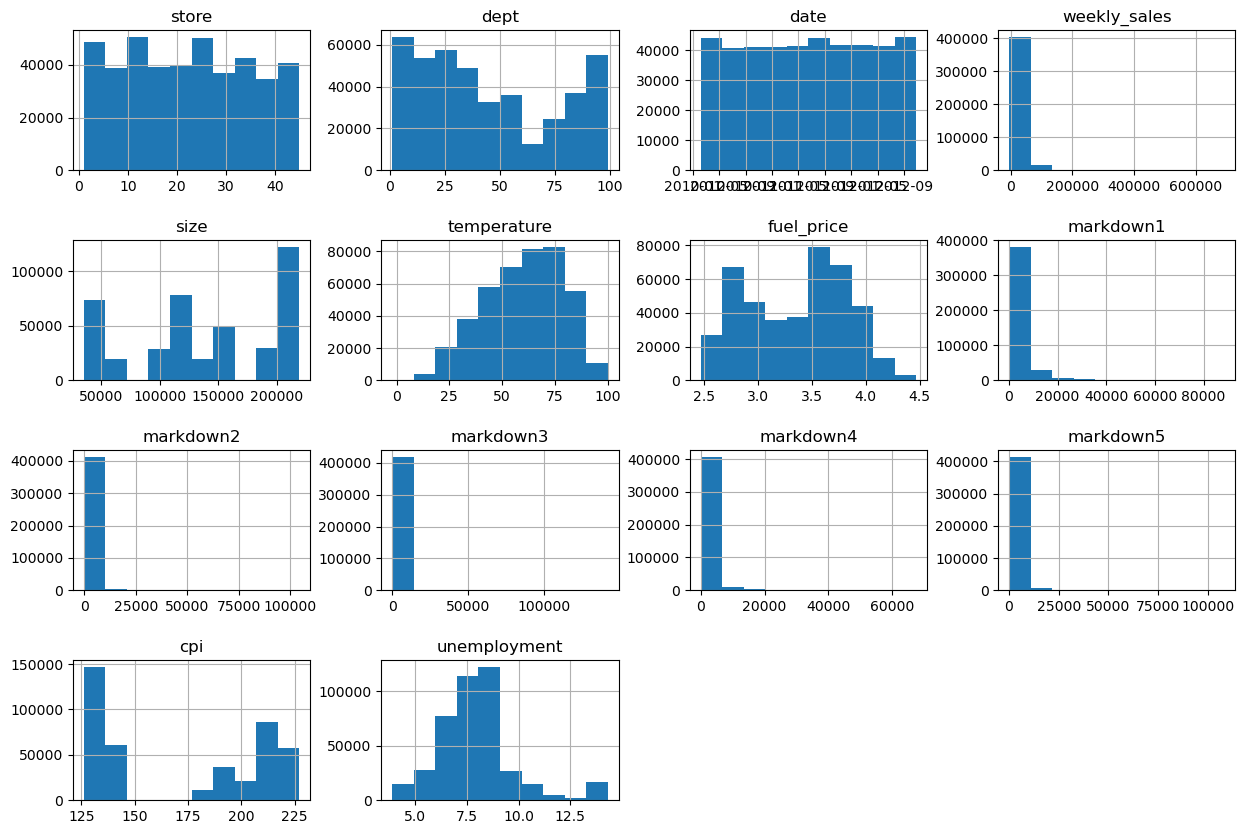

In [32]:
# plotting histogram 
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
plt.show()

* the distribution of weekly sales is highly right-skewed indicating that most observations have low sales values with a few with extreme high values.
* store Ids are fairly evenly distributed, suggesting balanced representation across stores in dataset
* The distribution across department is not uniform,with certain department appearing more frequently.
* the store size distribution is dispersed,means presence of small and large size of store
* temperature values looks aproximately normally distributed,with most observation concentrated in the mid range.
* fuel price are distributed within narraow range with mild variation over time
* markdown1-5 are highly right-skewed indicats with most values concentrated near zero and a small number of large promotional spikes.
* the cpi distribution is not uniform and apperes to clustered across specific ranges,reflecting changes in inflation levels across different periods.
* unemployment rates are concentrated around mid range values,showing moderate variability over time with peak around 8.

In [33]:
df['type'].unique()


array(['A', 'B', 'C'], dtype=object)

In [34]:
(df['type']=='A').sum()

np.int64(215478)

In [35]:
(df['type']=='B').sum(),(df['type']=='C').sum()


(np.int64(163495), np.int64(42597))

In [36]:
df.columns

Index(['store', 'dept', 'date', 'weekly_sales', 'isholiday', 'type', 'size',
       'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3',
       'markdown4', 'markdown5', 'cpi', 'unemployment'],
      dtype='object')

### negative weekly sale how to resolve it ?

In [37]:
# data have negative weekly sale
(df[df['weekly_sales']<0]).head()

,store,dept,date,weekly_sales,isholiday,type,size,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment
846,1,6,2012-08-10,-139.65,False,A,151315,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908
2384,1,18,2012-05-04,-1.27,False,A,151315,75.55,3.749,21290.13,0.0,69.89,4977.35,3261.04,221.671800,7.143
6048,1,47,2010-02-19,-863.00,False,A,151315,39.93,2.514,0.00,0.0,0.00,0.00,0.00,211.289143,8.106
6049,1,47,2010-03-12,-698.00,False,A,151315,57.79,2.667,0.00,0.0,0.00,0.00,0.00,211.380643,8.106
6051,1,47,2010-10-08,-58.00,False,A,151315,63.93,2.633,0.00,0.0,0.00,0.00,0.00,211.746754,7.838


In [38]:
(df['weekly_sales']<0).sum()

np.int64(1285)

* we have 1285 records with negative weekly sale it may be due to item returned back to store or billing correctness

In [39]:
df['log_weekly_sales']= np.log1p(df['weekly_sales']).clip(lower=0)

C:\Users\patid\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\patid\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [40]:
df.columns

Index(['store', 'dept', 'date', 'weekly_sales', 'isholiday', 'type', 'size',
       'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3',
       'markdown4', 'markdown5', 'cpi', 'unemployment', 'log_weekly_sales'],
      dtype='object')

* Median weekly sales around 7–8k, 50% of values (IQR) roughly between 2k and 20k

In [41]:
# filetring row where markdown is >0 
markdown_cols = ['markdown1','markdown2','markdown3','markdown4','markdown5']
df_mark = df[df[markdown_cols].sum(axis=1)>0]

In [42]:
df_mark.shape

(151432, 17)

In [43]:
# want to check weekly sale distribution with markdown and without markdown 
has_markdown_mask = df[markdown_cols].sum(axis=1) > 0
sales_with_markdown = df.loc[has_markdown_mask,'weekly_sales']
sales_without_markdown = df.loc[~has_markdown_mask, 'weekly_sales']


In [44]:
print('sales_with_markdown',sales_with_markdown.median())
print('sales_without_markdown',sales_without_markdown.median())


sales_with_markdown 7537.87
sales_without_markdown 7654.844999999999


In [45]:
print('sales_with_markdown',sales_with_markdown.mean())
print('sales_without_markdown',sales_without_markdown.mean())
#Weeks with markdowns show slightly higher average weekly sales,

sales_with_markdown 16177.015243805805
sales_without_markdown 15871.522017302268


C:\Users\patid\AppData\Local\Temp\ipykernel_40448\185507931.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


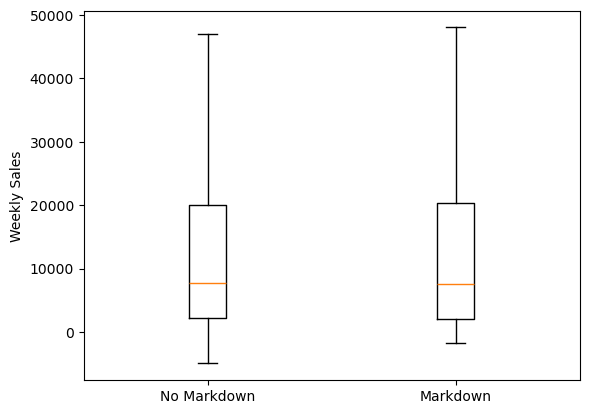

In [46]:
plt.boxplot(
    [sales_without_markdown, sales_with_markdown],
    labels=['No Markdown', 'Markdown'],
    showfliers=False
)
plt.ylabel('Weekly Sales')
plt.show()

In [47]:
df.head()

,store,dept,date,weekly_sales,isholiday,type,size,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,log_weekly_sales
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,10.123647
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,10.737277
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,10.635773
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,9.873262
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,9.990990


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   store             421570 non-null  int64         
 1   dept              421570 non-null  int64         
 2   date              421570 non-null  datetime64[ns]
 3   weekly_sales      421570 non-null  float64       
 4   isholiday         421570 non-null  bool          
 5   type              421570 non-null  object        
 6   size              421570 non-null  int64         
 7   temperature       421570 non-null  float64       
 8   fuel_price        421570 non-null  float64       
 9   markdown1         421570 non-null  float64       
 10  markdown2         421570 non-null  float64       
 11  markdown3         421570 non-null  float64       
 12  markdown4         421570 non-null  float64       
 13  markdown5         421570 non-null  float64       
 14  cpi 

In [49]:
print(df['date'].iloc[0]) 

2010-02-05 00:00:00


In [50]:
print(df['date'].dt.strftime('%Y-%m-%d'))

0         2010-02-05
1         2010-02-12
2         2010-02-19
3         2010-02-26
4         2010-03-05
             ...    
421565    2012-09-28
421566    2012-10-05
421567    2012-10-12
421568    2012-10-19
421569    2012-10-26
Name: date, Length: 421570, dtype: object


In [51]:
df.to_csv("Data_wrangle_cap3_walmartdata.csv", index=False)


In [52]:
df.to_pickle("Data_wrangle_credit_card_fraud.pkl")

In [53]:
#faster in processing -pickle, parquet file for big data,csv take high processing time # 

# for big data 10 to 12 file of parquest it works in parallel when we load it 